# Online Retail Customer Data Analysis

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Data=pd.read_csv('C:/Users/user/Desktop/intellipaat/Datasets/OnlineRetail.csv',encoding='iso-8859-1')

::::::::::::::::Data Wrangling(Cleaning)::::::::::::::::

In [30]:
Data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [31]:
Data['Total']=Data.Quantity*Data.UnitPrice

In [32]:
Data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [46]:
#Finding %age of Null Values in each column
(Data.isna().sum()/len(Data.CustomerID))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Total           0.000000
dtype: float64

In [53]:
#Wihout customerID, the record doesn't make much sence since it is the primary key of the dataset
Data.dropna(axis=0,how='any',inplace=True)

In [54]:
(Data.isna().sum()/len(Data.CustomerID))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
Total          0.0
dtype: float64

In [33]:
#Finding Outliers/Abnormalities (We don't want occasional quantity/Total to be there)
Data.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


<AxesSubplot:>

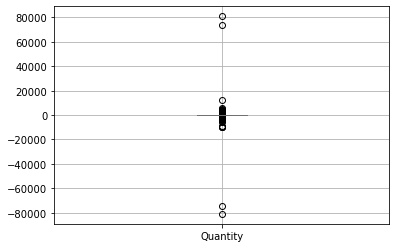

In [38]:
Data.boxplot(column='Quantity')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

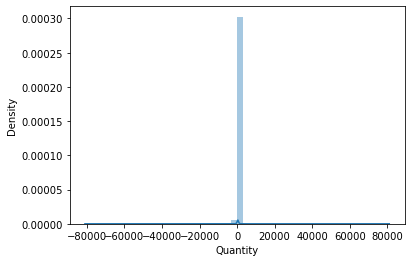

In [40]:
sns.distplot(Data['Quantity'])

<AxesSubplot:>

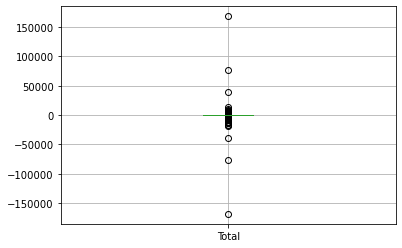

In [36]:
Data.boxplot(column='Total')

In [56]:
#Finding the IQR for Quantity column
Q1 = Data['Quantity'].quantile(0.25)
Q3 = Data['Quantity'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

10.0


In [57]:
Data = Data[(Data['Quantity'] >= Q1 - 1.5*IQR) & (Data['Quantity'] <= Q3 + 1.5*IQR)]

In [58]:
#Finding the IQR for Total column
Q1 = Data['Total'].quantile(0.25)
Q3 = Data['Total'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

13.45


In [59]:
Data = Data[(Data['Total'] >= Q1 - 1.5*IQR) & (Data['Total'] <= Q3 + 1.5*IQR)]

<AxesSubplot:>

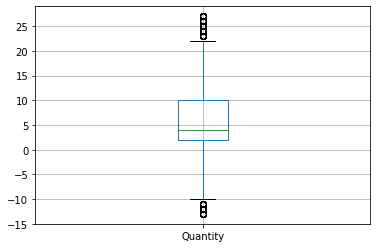

In [60]:
Data.boxplot(column='Quantity')

<AxesSubplot:>

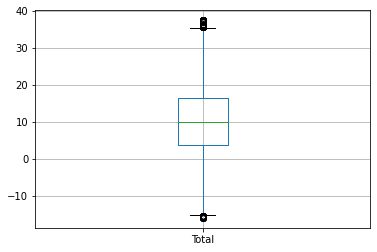

In [61]:
Data.boxplot(column='Total')

::::::::::::::Data Engineering (Exploratory Data Analysis)::::::::

In [75]:
#1)Best selling, Worst selling product(groupby with desc,quantity with max/min): helps in managing inventory
Temp1=Data.groupby(['Description'])['Description','Quantity'].sum().reset_index()

C:\Users\user\AppData\Local\Temp/ipykernel_9712/1304713053.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Temp1=Data.groupby(['Description'])['Description','Quantity'].sum().reset_index()


In [76]:
Product_Sales=Temp1.sort_values(by='Quantity',ascending=False).reset_index()

In [77]:
Product_Sales.head(1)

,index,Description,Quantity
0,2250,PACK OF 72 RETROSPOT CAKE CASES,14994


In [81]:
Product_Sales.columns

Index(['index', 'Description', 'Quantity'], dtype='object')

In [83]:
Product_Sales=Product_Sales.iloc[:,1:]

In [85]:
#top five products by sales
Product_Sales.head(5)

,Description,Quantity
0,PACK OF 72 RETROSPOT CAKE CASES,14994
1,ASSORTED COLOUR BIRD ORNAMENT,10275
2,LUNCH BAG RED RETROSPOT,9604
3,WHITE HANGING HEART T-LIGHT HOLDER,9019
4,JAM MAKING SET PRINTED,8594


In [133]:
#Bottom 5 product in terms of Sales: Can be discontinued
Product_Sales.tail(2)

,Description,Quantity
3841,PINK POODLE HANGING DECORATION,-12
3842,Discount,-25


Negative quantity indicates return items

In [134]:
#Beter to find items that didn' sell
Product_Sales.loc[(Product_Sales.Quantity==0)]

,Description,Quantity
3815,DIAMANTE HAIR GRIP PACK/2 PERIDOT,0
3816,DIAMANTE HAIR GRIP PACK/2 CRYSTAL,0
3817,PINK DAISY BAG CHARM,0
3818,WHITE BEADED GARLAND STRING 20LIGHT,0
3819,DAISY HAIR COMB,0
3820,SET 10 CARDS HANGING BAUBLES 17080,0


In [86]:
#  2)High End/Low End Customer based on mean buying value: helps in targeting customers with diff marketing strategies

In [106]:
Temp3=Data.groupby(['CustomerID']).sum().reset_index().sort_values(by='Total',ascending=False).reset_index()

In [107]:
Temp3.drop({'index','Quantity','UnitPrice'},axis=1,inplace=True)

In [110]:
# Top 5(or x) buyers: can offer such customers COUPONS for being valued customers
Temp3.head(5)

,CustomerID,Total
0,14911.0,80142.44
1,14096.0,40907.39
2,17841.0,34699.23
3,13089.0,25990.56
4,12748.0,22401.61


In [62]:
# 4)High End Customer shopping list mean value grouped by items: To offer discounts
# Find the top contributing customers and search their list
Temp=Data.groupby(['CustomerID','Description']).mean().reset_index()

In [63]:
Temp

,CustomerID,Description,Quantity,UnitPrice,Total
0,12347.0,3D DOG PICTURE PLAYING CARDS,12.0,2.95,35.40
1,12347.0,3D SHEET OF CAT STICKERS,12.0,0.85,10.20
2,12347.0,3D SHEET OF DOG STICKERS,12.0,0.85,10.20
3,12347.0,60 TEATIME FAIRY CAKE CASES,24.0,0.55,13.20
4,12347.0,72 SWEETHEART FAIRY CAKE CASES,24.0,0.55,13.20
...,...,...,...,...,...
248259,18287.0,SMALL YELLOW BABUSHKA NOTEBOOK,12.0,0.85,10.20
248260,18287.0,STAR T-LIGHT HOLDER WILLIE WINKIE,12.0,1.65,19.80
248261,18287.0,STRAWBERRY CERAMIC TRINKET BOX,12.0,1.25,15.00
248262,18287.0,SWISS CHALET TREE DECORATION,24.0,0.29,6.96


In [124]:
Temp.loc[(Temp.CustomerID==14911)].sort_values(by='Quantity',ascending=False)

,CustomerID,Description,Quantity,UnitPrice,Total
109715,14911.0,WRAP BAD HAIR DAY,25.0,0.10,2.50
109725,14911.0,WRAP RED APPLES,25.0,0.42,10.50
109723,14911.0,WRAP PAISLEY PARK,25.0,0.42,10.50
109721,14911.0,WRAP GINGHAM ROSE,25.0,0.42,10.50
109720,14911.0,WRAP ENGLISH ROSE,25.0,0.42,10.50
...,...,...,...,...,...
109620,14911.0,VINTAGE GOLD TINSEL REEL,-6.0,0.42,-2.52
109072,14911.0,PENS ASSORTED FUNKY JEWELED,-7.0,0.19,-1.33
108421,14911.0,DAIRY MAID STRIPE MUG,-8.0,0.79,-6.32
109119,14911.0,PINK POODLE HANGING DECORATION,-12.0,0.38,-4.56


In [130]:
# 5)Number of Unique Customers for the current month: Tracks online footfalls, can be used to compare with offline footfalls
len(Data.CustomerID.unique())

4210

End Of Analysis